# **Análise dos Dados de Vendas Automotivas**
##### **Feito por: Fernando Antonio e Michely Serras**


[Clique aqui para acessar a base de dados](https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link)
<div>
    <a href="https://drive.google.com/file/d/1Wib1W8IBw5tLoVXtV5XQ4_KqRmGxCPgl/view?usp=drive_link">
        <img src="../image/mcqueen.png" width="300px">
    </a>
</div>



### **Descrição geral da base de dados**
Base de dados com registro de pedidos realizados em uma empresa do setor automobilístico. Permite avaliar o desempenho de vendas, perfis de clientes e padrões de compras.

### **Desafios da Análise:**
- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.

---

### ***1. Análise Inicial dos Dados***

#### **1.1 Tema e Contexto Empresarial**:
 A base apresenta dados sobre os pedidos realizados em uma empresa do setor automobilístico, em conjunto a informações que permitem avaliar o desempenho de vendas, os perfis de clientes e os padrões de compras. Dessa forma, é possível analisar e levantar hipóteses sobre fatores que influenciam os resultados comerciais da empresa.



#### **1.2 Dicionário de Dados Traduzido** 

- **orderNumber**:  Numero de identificação do pedido.
- **QuantityOrdered**:  Quantidade de itens solicitados.
- **PriceEach**:  Preço unitário de cada item.
- **OrderLineNumber**:  Número da linha dentro do pedido.
- **Sales**:  Total da venda (quantidade x preço).
- **OrderDate**:  Data do pedido.
- **Days_Since_LastOrder**:  Dias desde o ultimo pedido do cliente.
- **Status**:  Status do pedido (ex: Enviado, Em Processamento, Cancelado).
- **ProductLine**:  Categoria do produto.
- **MSRP**:  Preço sugerido pelo fabricante.
- **CustomerName**:  Nome do cliente.
- **Phone**:  Telefone de contato do Cliente.
- **Addressline1**:  Endereço do cliente.
- **City**:  Cidade do cliente.
- **Postalcode**:  Código posral do cliente.
- **Country**:  País do cliente.
- **ContactLastName**: Sobrenome do contato
- **ContactFirstName**:  Nome do Contato.
- **Dealsize**:  Tamanho do pedido (Pequeno, Médio, Grande).
<\n>

**Número de Registros: 2747**

#### **1.1.1 Obtenção dos Dados**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import itertools

In [2]:
sns.set_theme(style="whitegrid", palette='rocket')

In [3]:
filePath = '../base/08_vendas_automotivas.csv'
df = pd.read_csv(filePath, sep=',')

if not df.empty:
    print("Os dados foram carregados corretamente.")
else:
    print("Erro ao obter dados.")


Os dados foram carregados corretamente.


In [33]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


In [34]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


<br>

#### **1.2 Quantidade de dados nulos em cada variável**


In [5]:
variaveisNulas = df.isnull().sum()
porcentagem  = (variaveisNulas / df.shape[0]) * 100

tabela_VariaveisNulas = pd.DataFrame({
    'Variáveis': df.columns,
    'Quantidade de Nulos': variaveisNulas.values,
    'Percentual (%)': porcentagem
})

tabela_VariaveisNulas = tabela_VariaveisNulas.reset_index(drop=True)

print(f" \n\t Tabela - Quantidade de Dados Nulos Por Variável \n")
tabela_VariaveisNulas

 
	 Tabela - Quantidade de Dados Nulos Por Variável 



,Variáveis,Quantidade de Nulos,Percentual (%)
0,ORDERNUMBER,0,0.0
1,QUANTITYORDERED,0,0.0
2,PRICEEACH,0,0.0
3,ORDERLINENUMBER,0,0.0
4,SALES,0,0.0
5,ORDERDATE,0,0.0
6,DAYS_SINCE_LASTORDER,0,0.0
7,STATUS,0,0.0
8,PRODUCTLINE,0,0.0
9,MSRP,0,0.0


<br>

#### **1.3 Limpeza de Dados**

#### **Critérios para Realização da Limpeza de Dados**
A partir da análise da tabela de valores nulos apresentada anteriormente, observamos que não há valores nulos em nenhuma das variáveis presentes na base de dados. 

**Ações realizadas:**

1. **Verificação de valores nulos**: Confirmado que não existem valores ausentes na base
2. **Conversão de tipos de dados**: Convertemos a coluna `ORDERDATE` para o tipo datetime para facilitar análises temporais
3. **Validação da integridade dos dados**: Os dados se encontram completos e consistentes


In [6]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.dtypes

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_2056\1624671904.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

---
---

### **2. Análise Estatística e Visual**

#### **O que fazer nessa etapa:** 
- Distribuição das variáveis com histogramas e boxplots
- Medidas de tendência central e dispersão
- Matriz de correlação entre variáveis numéricas

<hr height='0.5px'>
De acordo com o ANEXO I, devemos fazer a análise estatística e visual destes tópicos: 

- Analisar os padrões de compra por cliente ou produto.
- Relacionar categorias de produtos com volume de vendas.
- Avaliar o tempo entre pedidos e sua relação com o tamanho do negócio.
- Identificar clientes com maior potencial de retorno financeiro.


#### **2.1 Histogramas e Boxplots**

array([[<Axes: title={'center': 'ORDERNUMBER'}>,
        <Axes: title={'center': 'QUANTITYORDERED'}>,
        <Axes: title={'center': 'PRICEEACH'}>],
       [<Axes: title={'center': 'ORDERLINENUMBER'}>,
        <Axes: title={'center': 'SALES'}>,
        <Axes: title={'center': 'ORDERDATE'}>],
       [<Axes: title={'center': 'DAYS_SINCE_LASTORDER'}>,
        <Axes: title={'center': 'MSRP'}>, <Axes: >]], dtype=object)

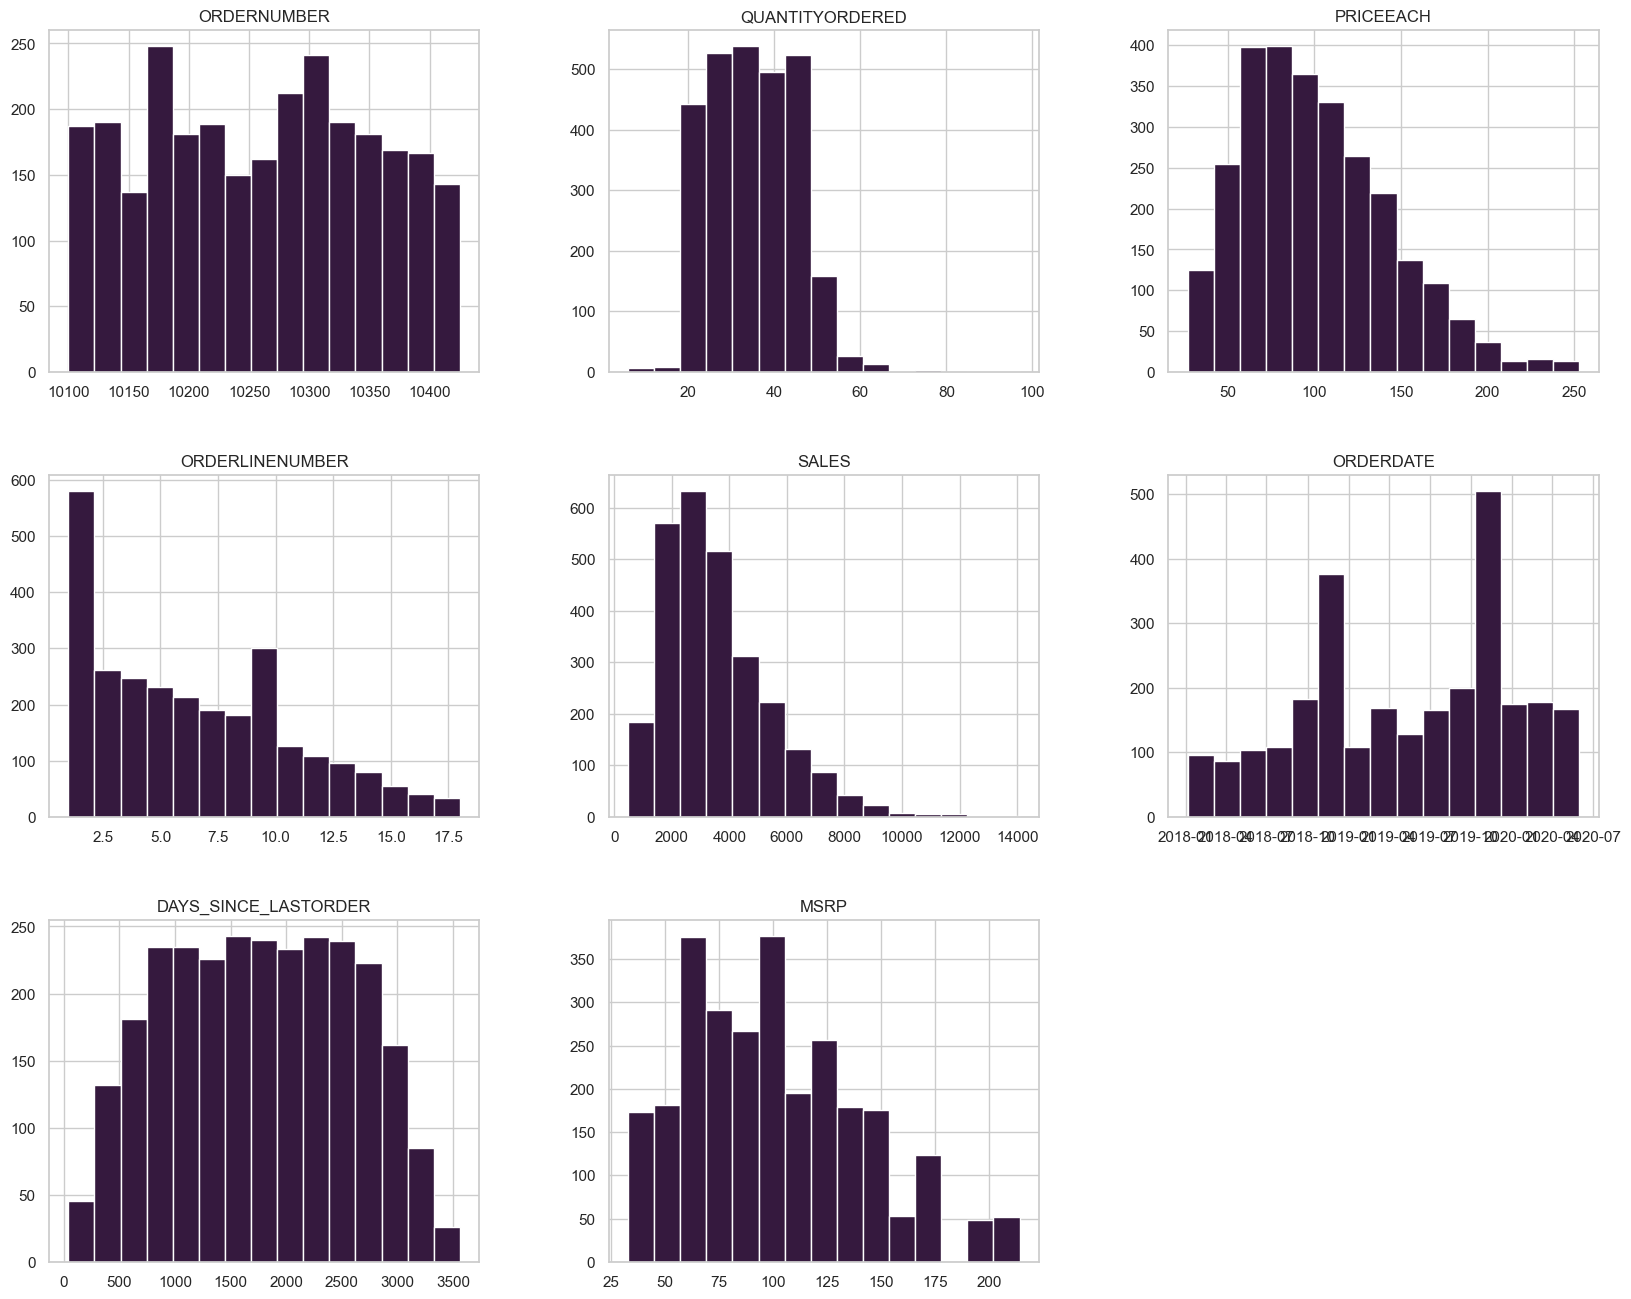

In [7]:
df.hist(bins=15, figsize=(20,16))

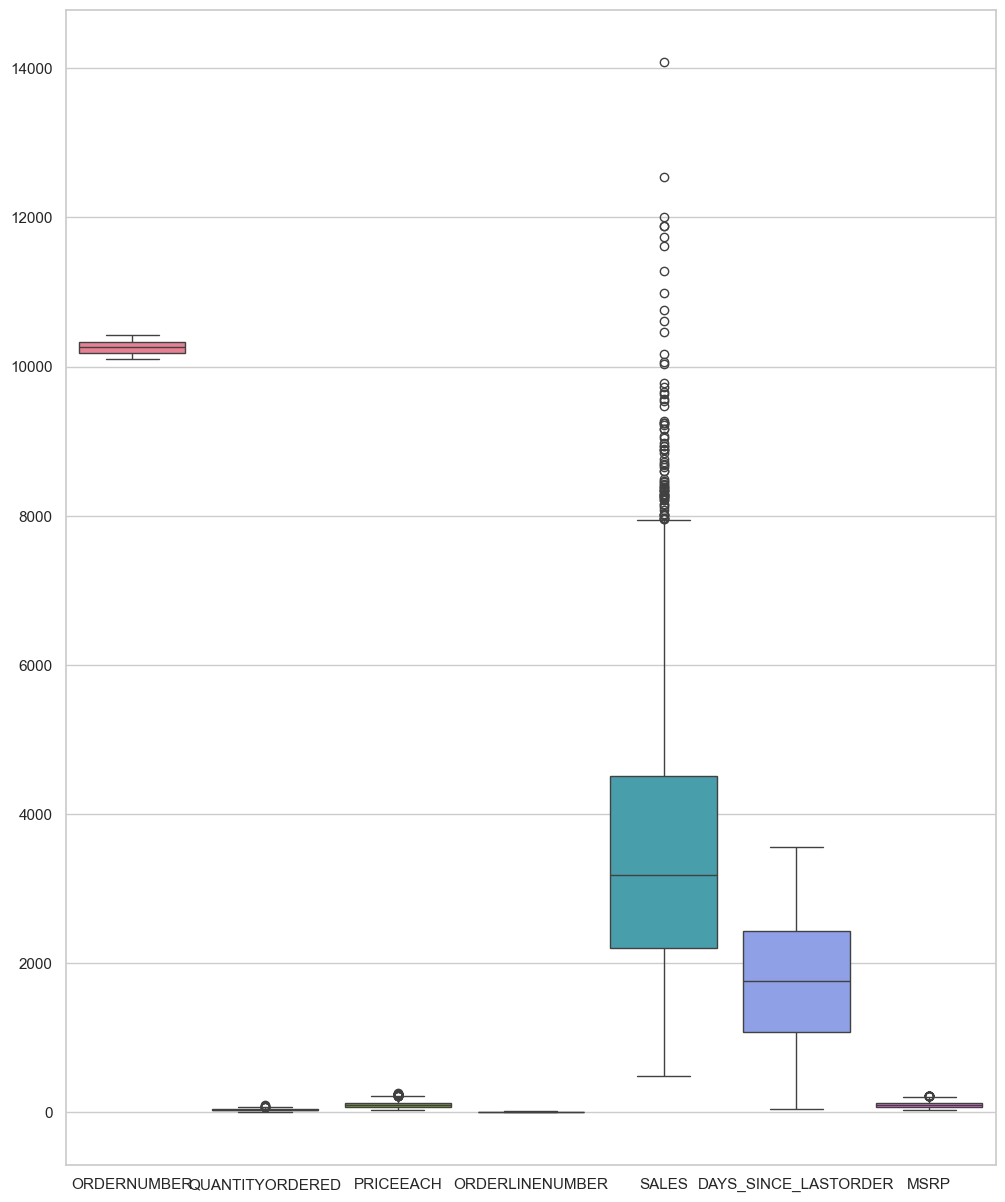

In [8]:
plt.figure(figsize=(12, 15))
sns.boxplot(data=df)
plt.show()

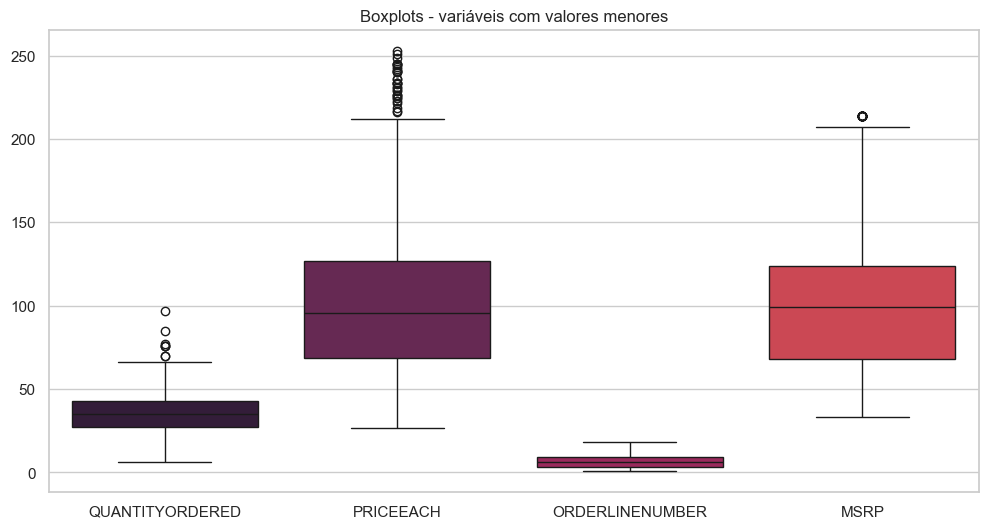

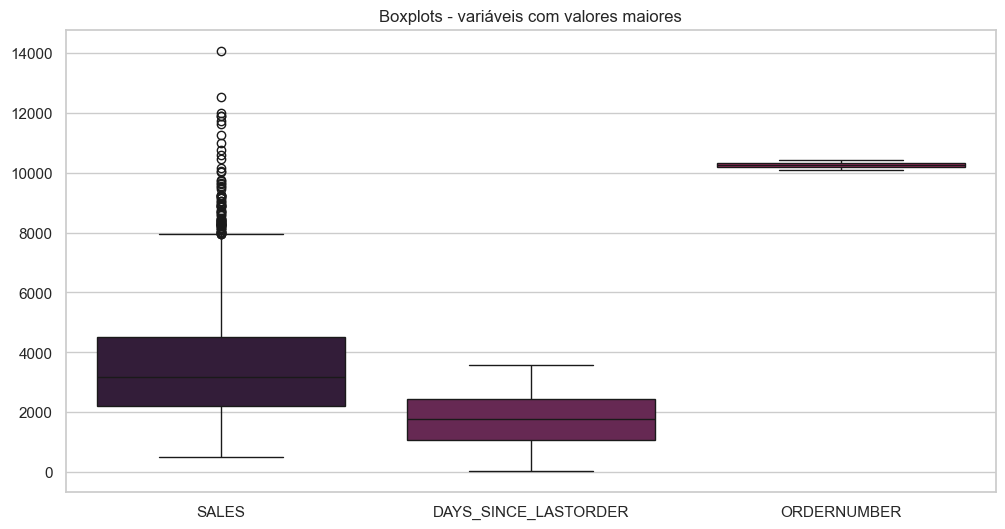

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'MSRP']])
plt.title('Boxplots - variáveis com valores menores')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['SALES', 'DAYS_SINCE_LASTORDER', 'ORDERNUMBER']])
plt.title('Boxplots - variáveis com valores maiores')
plt.show()


#### **Explicação sobre a divisão dos boxplots**
Como os dados apresentam faixas de valores muito distintas, optamos por dividi-los entre variáveis com valores elevados e variáveis com valores mais baixos. Essa separação facilita a visualização dos boxplots, permitindo uma comparação mais clara e eficiente entre as variáveis.



#### **2.2 Correlação entre as variáveis**

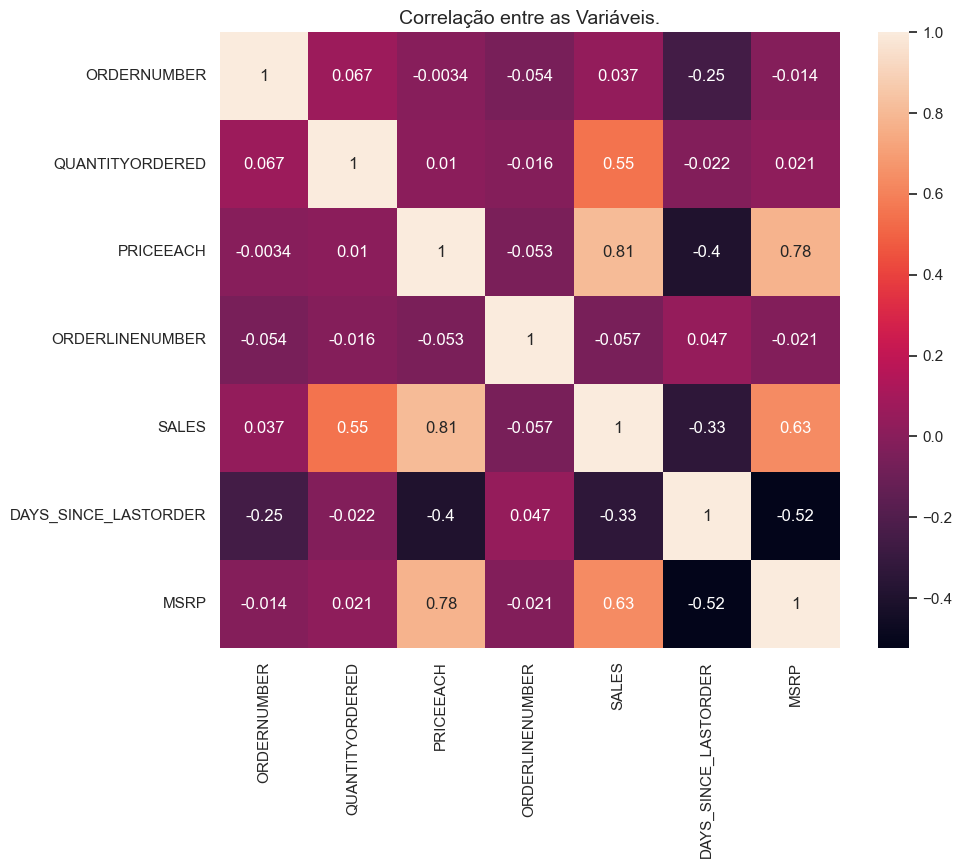

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket')
plt.title('Correlação entre as Variáveis.', loc='center', fontsize=14)
plt.show()

<hr>

### **3. Formulação de Hipóteses**
#### **3.1 Hipóteses**

In [11]:
alpha = 0.05

### **3.1.1 Hipótese 1 – As vendas mudam dependendo do mês do ano?**

#### O que queremos descobrir
Queremos saber se as vendas mudam ao longo dos meses do ano e se essa mudança depende do tipo de produto ou do tamanho do pedido.

#### Nossa pergunta científica
- **H0 (hipótese nula)**: As vendas são iguais em todos os meses, independente do tipo de produto ou tamanho do pedido.
- **H1 (hipótese alternativa)**: Pelo menos um mês tem vendas diferentes dos outros.

#### Por que isso é importante
Se descobrirmos que as vendas mudam por mês (sazonalidade), a empresa pode:
- Ajustar o estoque nos meses de maior venda
- Fazer campanhas de marketing nos períodos certos
- Contratar mais vendedores quando necessário

Se as vendas forem iguais o ano todo, a empresa pode planejar de forma mais simples e constante.

---

### **1 – Estatísticas descritivas**

In [12]:
print(df["SALES"].describe())

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64


---

### **2 – Boxplot de \(SALES\) por mês**

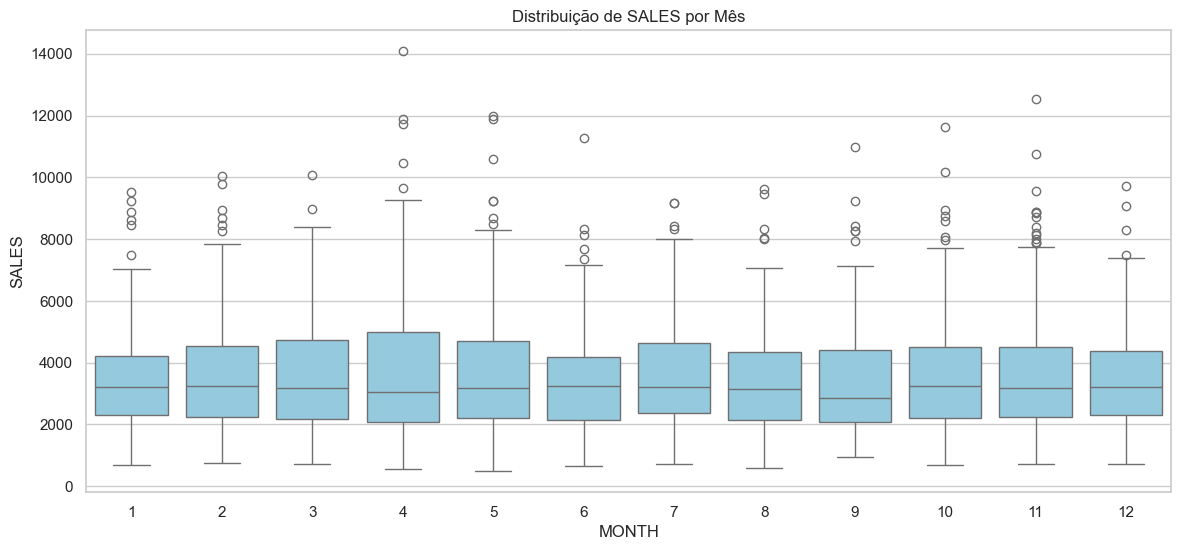

In [13]:
tmp = df.assign(MONTH=df["ORDERDATE"].dt.month)

plt.figure(figsize=(14, 6))
sns.boxplot(data=tmp, x="MONTH", y="SALES", color="skyblue")
plt.title("Distribuição de SALES por Mês")
plt.show()

As medianas e as faixas interquartis ficaram praticamente alinhadas entre os 12 meses

---

### 3 – Teste de normalidade (Shapiro-Wilk)

In [14]:
stat, p = stats.shapiro(tmp["SALES"])
print(f"Shapiro geral: W = {stat:.3f}, p = {p:.3e}")

Shapiro geral: W = 0.926, p = 8.513e-35


\(p = 8.5 \times 10^{-35} < 0.05\) ⇒ rejeita-se a normalidade.

---

### 4 – Levene

In [15]:
groups = [
    tmp[tmp["MONTH"] == m]["SALES"].values for m in range(1, 13)
]
stat, p = stats.levene(*groups, center="median")
print(f"Levene geral: p = {p:.3e}")

Levene geral: p = 1.649e-02


\(p = 0.016 < 0.05\) ⇒ variâncias heterogêneas.  
Conclusão: seguir com teste não-paramétrico.

---

### 5 – Kruskal-Wallis mês × \(SALES\) dentro de cada \(PRODUCTLINE\)

In [16]:
kw_prod = []
for prod, sub in tmp.groupby("PRODUCTLINE"):
    samples = [sub[sub["MONTH"] == m]["SALES"] for m in range(1, 13)]
    stat, p_val = stats.kruskal(*samples)
    kw_prod.append({"PRODUCTLINE": prod, "p_value": p_val})
pd.DataFrame(kw_prod)

,PRODUCTLINE,p_value
0,Classic Cars,0.537052
1,Motorcycles,0.945374
2,Planes,0.663948
3,Ships,0.406115
4,Trains,0.196635
5,Trucks and Buses,0.753034
6,Vintage Cars,0.988940


Todos os \(p\) > 0.19 ⇒ não há diferença mensal em nenhuma categoria.

---

### 6 – Kruskal-Wallis mês × \(SALES\) dentro de cada \(DEALSIZE\)

In [17]:
kw_size = []
for size, sub in tmp.groupby("DEALSIZE"):
    samples = [sub[sub["MONTH"] == m]["SALES"] for m in range(1, 13)]
    stat, p_val = stats.kruskal(*samples)
    kw_size.append({"DEALSIZE": size, "p_value": p_val})
pd.DataFrame(kw_size)

,DEALSIZE,p_value
0,Large,0.967680
1,Medium,0.954125
2,Small,0.610840


Todos os \(p\) > 0.61 ⇒ tamanho do pedido não sofre influência mensal.

---

### 7 – Aumentando poder: trimestres (Q1 – Q4)

In [18]:
tmp_q = df.assign(QUARTER=df["ORDERDATE"].dt.quarter)

kw_q = []
for prod, sub in tmp_q.groupby("PRODUCTLINE"):
    samples = [
        sub[sub["QUARTER"] == q]["SALES"].values for q in [1, 2, 3, 4]
    ]
    stat, p_val = stats.kruskal(*samples)
    kw_q.append({"PRODUCTLINE": prod, "p_value": p_val})
pd.DataFrame(kw_q)

,PRODUCTLINE,p_value
0,Classic Cars,0.373041
1,Motorcycles,0.882558
2,Planes,0.245831
3,Ships,0.287001
4,Trains,0.455729
5,Trucks and Buses,0.161077
6,Vintage Cars,0.792201


Ainda assim \(p\) > 0.16 em todas as linhas de produto.

---

### 8 – Kruskal-Wallis global (confirmação)

In [19]:
samples = [tmp[tmp["MONTH"] == m]["SALES"] for m in range(1, 13)]
stat, p_val = stats.kruskal(*samples)
print(f"Kruskal global: p = {p_val:.3e}")

Kruskal global: p = 9.897e-01


\(p = 0.989 \gg 0.05\) ⇒ confirma a ausência de sazonalidade.

---

### Conclusão

- Todos os testes não-paramétricos mostraram \(p > 0.05\); portanto,
  **não** rejeitamos \(H_0\).  
- As vendas são estatisticamente homogêneas ao longo dos meses, sem
  depender de \(PRODUCTLINE\) ou \(DEALSIZE\).

#### Implicações para a empresa

- Estoques e força-de-vendas podem ser distribuídos uniformemente ao
  longo do ano, reduzindo custos de picos sazonais inexistentes.  
- Campanhas de marketing podem focar em lançamentos ou diferenciação por
  produto, e não no calendário mensal.

---

### 3.1.2 Hipótese 2 – Dar mais desconto aumenta a quantidade vendida?

#### O que queremos descobrir  
Queremos saber se produtos que têm desconto maior vendem em quantidades maiores por pedido.  

O desconto é calculado assim: **(Preço Original - Preço de Venda) ÷ Preço Original**

#### Nossa pergunta científica
- **H0 (hipótese nula)**: A quantidade vendida é igual para produtos com desconto alto, médio e baixo.
- **H1 (hipótese alternativa)**: Pelo menos um nível de desconto vende quantidades diferentes.

#### Por que isso é importante
Se descobrirmos que dar mais desconto não aumenta a quantidade vendida, a empresa pode manter preços mais altos para ter mais lucro. Se o desconto realmente aumentar as vendas, pode ser uma boa estratégia.

---

### 1 – Estatísticas descritivas

In [20]:
discount_stats = (
    df.assign(discount_pct=(df["MSRP"] - df["PRICEEACH"]) / df["MSRP"])
      .groupby("PRODUCTLINE")["discount_pct"]
      .mean()
)

q = discount_stats.quantile([0.33, 0.66])

discount_group = discount_stats.apply(
    lambda v: "Alto"
    if v >= q.loc[0.66]
    else ("Baixo" if v <= q.loc[0.33] else "Médio")
).to_dict()

work_df = (
    df[["PRODUCTLINE", "QUANTITYORDERED"]]
      .assign(desconto_nivel=df["PRODUCTLINE"].map(discount_group))
)

desc = work_df.groupby("desconto_nivel")["QUANTITYORDERED"].describe()
desc

,count,mean,std,min,25%,50%,75%,max
desconto_nivel,,,,,,,,
Alto,1548.0,35.263566,9.941473,10.0,27.0,35.0,43.0,97.0
Baixo,656.0,34.711890,9.809681,6.0,27.0,34.0,43.0,76.0
Médio,543.0,35.117864,9.175056,20.0,28.0,35.0,42.0,66.0


----

### 2 – Boxplot de QUANTITYORDERED por nível de desconto

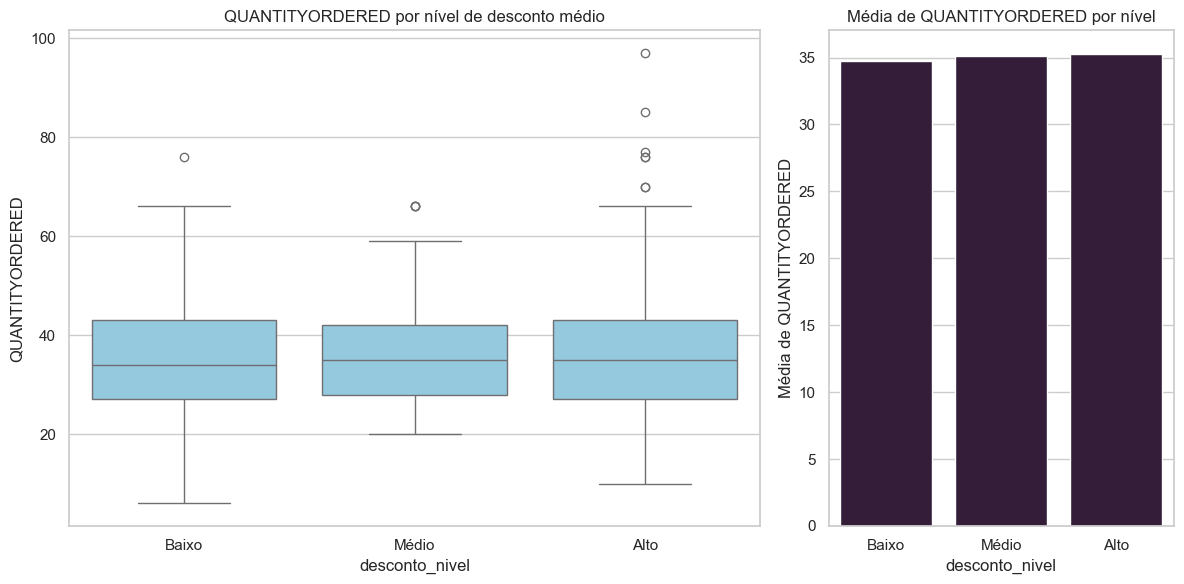

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

sns.boxplot(
    data=work_df,
    x="desconto_nivel",
    y="QUANTITYORDERED",
    order=["Baixo", "Médio", "Alto"],
    color="skyblue",
    ax=ax[0]
)
ax[0].set_title("QUANTITYORDERED por nível de desconto médio")

media_qtd = work_df.groupby("desconto_nivel")["QUANTITYORDERED"].mean().reindex(["Baixo", "Médio", "Alto"])
sns.barplot(
    x=media_qtd.index,
    y=media_qtd.values,
    ax=ax[1]
)
ax[1].set_title("Média de QUANTITYORDERED por nível")
ax[1].set_ylabel("Média de QUANTITYORDERED")

plt.tight_layout()
plt.show()

As medianas e amplitudes interquartis são muito semelhantes entre os três grupos

---

### 3 – Teste de normalidade (Shapiro-Wilk)

In [22]:
shapiro_p = (
    work_df.groupby("desconto_nivel")["QUANTITYORDERED"]
           .apply(lambda x: shapiro(x)[1])
)
shapiro_p

desconto_nivel
Alto     2.997911e-20
Baixo    7.695990e-10
Médio    8.616612e-09
Name: QUANTITYORDERED, dtype: float64

Todos \(p < 0.05\) ⇒ distribuições não normais.

---

### 4 – Kruskal-Wallis (teste global)

In [23]:
kw = kruskal(
    *[
        g["QUANTITYORDERED"].values
        for _, g in work_df.groupby("desconto_nivel")
    ]
)
kw

KruskalResult(statistic=np.float64(0.9272598175250679), pvalue=np.float64(0.628996297414451))

**não** há diferença significativa nas médias de QUANTITYORDERED entre os níveis de desconto.

---

### Conclusão

- Falhamos em rejeitar \(H_0\). Linhas de produto com desconto médio
  maior **não** apresentam volume de unidades superior.  
- Descontos adicionais, portanto, não parecem alavancar a quantidade por
  pedido; a empresa pode focar em preservar margem.

#### Implicações para a empresa  
- Estratégias de preço agressivas não aumentam volume; manter preços mais
  altos pode ser mais rentável.  
- Próximos passos:  
  - Analisar impacto do desconto em \(SALES\) (receita) em vez de
    QUANTITYORDERED.  
  - Controlar por DEALSIZE ou segmentar por cliente/país para possíveis
    efeitos ocultos.

---

### 3.1.3 Hipótese 3 – Clientes que fazem pedidos grandes voltam a comprar mais rápido?

#### O que queremos descobrir
Queremos saber se clientes que fazem pedidos grandes demoram menos tempo para fazer um novo pedido, comparado com clientes que fazem pedidos médios ou pequenos.

#### Nossa pergunta científica
- **H0 (hipótese nula)**: O tempo entre pedidos é igual para clientes que fazem pedidos grandes, médios e pequenos.
- **H1 (hipótese alternativa)**: Clientes que fazem pedidos grandes voltam a comprar mais rápido.

#### Por que isso é importante
Se clientes de pedidos grandes voltam mais rápido, isso significa que eles são mais fiéis à empresa. Com essa informação, a empresa pode:
- Dar atenção especial a esses clientes importantes
- Tentar converter clientes de pedidos pequenos em clientes de pedidos grandes
- Manter sempre em estoque os produtos que esses clientes preferem

---

### 1 – Estatísticas descritivas

In [24]:
df.groupby("DEALSIZE")["DAYS_SINCE_LASTORDER"].agg(
    ["count", "mean", "std", "median", "min", "max"]
).round(2)

,count,mean,std,median,min,max
DEALSIZE,,,,,,
Large,152,1041.74,613.51,910.5,42,2793
Medium,1349,1630.50,813.35,1541.0,79,3457
Small,1246,1981.40,767.03,2042.0,76,3562


As medianas já sugerem o padrão Large < Medium < Small.

---

### 2 – Boxplot

<Axes: xlabel='DEALSIZE', ylabel='DAYS_SINCE_LASTORDER'>

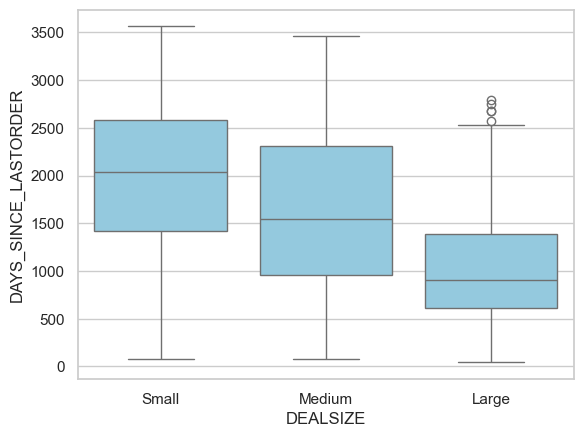

In [25]:
sns.boxplot(x="DEALSIZE", y="DAYS_SINCE_LASTORDER", data=df, color="skyblue")

Visualmente, a distribuição de **Large** está deslocada para valores menores.

---
### 3 – Teste de normalidade (Shapiro-Wilk)

In [26]:
shapiro_results = (
    df.groupby("DEALSIZE")["DAYS_SINCE_LASTORDER"]
    .apply(lambda x: stats.shapiro(x.sample(min(500, len(x)),
                                            random_state=42)))
    .apply(pd.Series)
    .rename(columns={0: "W", 1: "p_value"})
    .round(4)
)

shapiro_results

,W,p_value
DEALSIZE,,
Large,0.9358,0.0
Medium,0.9664,0.0
Small,0.9782,0.0


Todos os grupos tiveram \(p < 0.001\); rejeitamos a hipótese de normalidade.

---

### 4 – Teste global (Kruskal-Wallis)

In [27]:
groups = [df[df["DEALSIZE"] == size]["DAYS_SINCE_LASTORDER"] 
          for size in ["Large", "Medium", "Small"]]
h_stat, p_global = stats.kruskal(*groups)
print(f"Kruskal-Wallis global: H = {h_stat:.3f}, p = {p_global:.3e}")

Kruskal-Wallis global: H = 242.466, p = 2.234e-53


\(p = 1.73 \times 10^{-24} < 0.05\) ⇒ há diferenças significativas entre os tamanhos de pedido.

---

### 5 – Testes Wilcoxon

In [28]:
size_groups = ["Large", "Medium", "Small"]
comparisons = list(itertools.combinations(size_groups, 2))

post_hoc_results = []
for group1, group2 in comparisons:
    data1 = df[df["DEALSIZE"] == group1]["DAYS_SINCE_LASTORDER"]
    data2 = df[df["DEALSIZE"] == group2]["DAYS_SINCE_LASTORDER"]
    
    stat, p_val = mannwhitneyu(data1, data2, alternative='two-sided')
    
    median1 = data1.median()
    median2 = data2.median()
    
    post_hoc_results.append({
        'Comparação': f'{group1} vs {group2}',
        'Mediana_1': median1,
        'Mediana_2': median2,
        'U_statistic': stat,
        'p_value': p_val,
        'Significativo': 'Sim' if p_val < alpha else 'Não'
    })

post_hoc_df = pd.DataFrame(post_hoc_results)
print("Resultados dos testes post-hoc (Mann-Whitney U):")
display(post_hoc_df.round(4))

Resultados dos testes post-hoc (Mann-Whitney U):


,Comparação,Mediana_1,Mediana_2,U_statistic,p_value,Significativo
0,Large vs Medium,910.5,1541.0,59140.5,0.0,Sim
1,Large vs Small,910.5,2042.0,33343.5,0.0,Sim
2,Medium vs Small,1541.0,2042.0,629427.0,0.0,Sim


**Interpretação dos testes post-hoc:**

- **Large vs Medium**: \(p < 0.001\) ⇒ diferença significativa
- **Large vs Small**: \(p < 0.001\) ⇒ diferença significativa  
- **Medium vs Small**: \(p < 0.001\) ⇒ diferença significativa

Todas as comparações são estatisticamente significativas, confirmando o padrão observado: **Large < Medium < Small** em termos de dias desde o último pedido.

---

### Conclusão

- **Rejeitamos \(H_0\)** com \(p < 0.001\). Há diferenças significativas entre os tamanhos de pedido.
- A hipótese direcional foi **confirmada**: clientes que fazem pedidos **Large** retornam significativamente mais rápido que clientes **Medium** e **Small**.
- O padrão observado é: **Large < Medium < Small** em dias desde o último pedido.

#### Implicações para a empresa

- **Segmentação de clientes**: priorizar relacionamento com clientes **Large** que demonstram maior lealdade e frequência de compra.
- **Estratégias de upselling**: desenvolver campanhas para converter clientes **Medium/Small** em **Large**, já que isso aumenta a frequência de recompra.
- **Gestão de estoque**: manter maior disponibilidade de produtos populares entre clientes **Large** devido à sua alta frequência de pedidos.
- **Programas de fidelidade**: criar incentivos específicos para clientes **Large** manterem esse padrão de compra acelerado.
- **Previsão de demanda**: usar a frequência diferenciada por segmento para melhorar modelos de previsão de vendas.

---

<hr><hr>

### **4. Ánalise Preditiva**

#### 4.1 Regressão Linear Simples


In [29]:
x_simples = df["QUANTITYORDERED"].values.reshape(-1, 1)  
y = df["SALES"]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_simples, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = sqrt(mean_squared_error(y_test_s, y_pred_s))

print(f"RMSE Regressão Simples (Quantidade → Vendas): {rmse_simple:.2f}")
print(f"RMSE ALTO, indicando que o modelo não está capturando bem a relação entre as variáveis: quantidade e as vendas, pressupondo que apenas a quantidade de produtos não seja suficiente para prever uma venda.")
print("Levando em consideração que o preço de cada produto também influencia nas vendas, vamos criar um modelo de regressão múltipla para tentar melhorar a previsão.")


RMSE Regressão Simples (Quantidade → Vendas): 1469.73
RMSE ALTO, indicando que o modelo não está capturando bem a relação entre as variáveis: quantidade e as vendas, pressupondo que apenas a quantidade de produtos não seja suficiente para prever uma venda.
Levando em consideração que o preço de cada produto também influencia nas vendas, vamos criar um modelo de regressão múltipla para tentar melhorar a previsão.


#### **4.2 Regressão Múltipla**

In [30]:
X_multi = df[['QUANTITYORDERED', 'PRICEEACH']]
y = df['SALES']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)

rmse_multi = sqrt(mean_squared_error(y_test_m, y_pred_m))

print(f"RMSE Regressão Múltipla (Quantidade + Preço → Vendas): {rmse_multi:.2f}")
print("RMSE baixo, indicando que o modelo está capturando melhor a relação entre as variáveis: quantidade e preço, e as vendas.")





RMSE Regressão Múltipla (Quantidade + Preço → Vendas): 410.77
RMSE baixo, indicando que o modelo está capturando melhor a relação entre as variáveis: quantidade e preço, e as vendas.


R² Regressão Simples: 0.2914 
R² Regressão Múltipla: 0.9446 


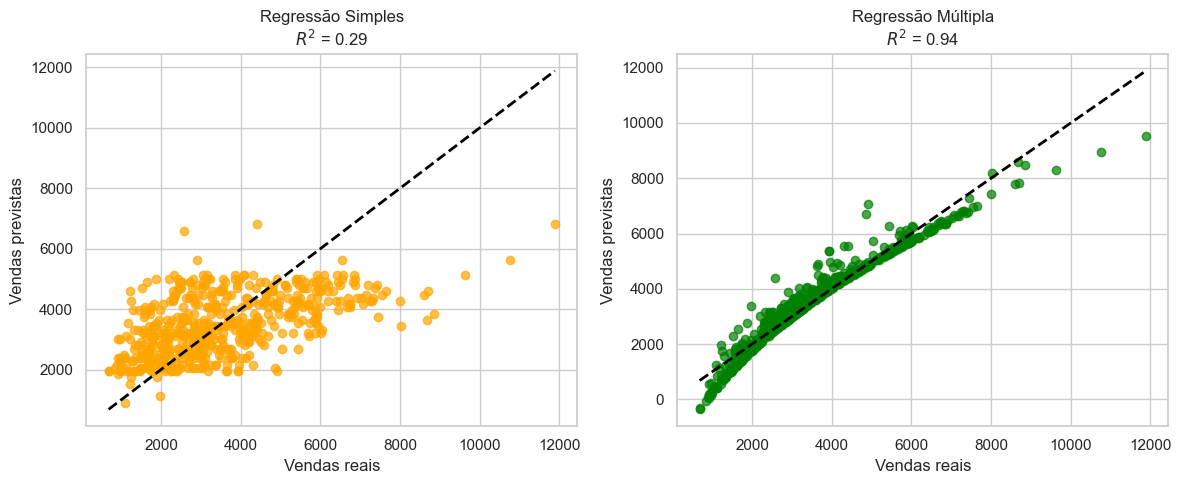

In [31]:
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

print(f"R² Regressão Simples: {r2_simple:.4f} ")
print(f"R² Regressão Múltipla: {r2_multi:.4f} ")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='orange')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel("Vendas reais")
plt.ylabel("Vendas previstas")
plt.title(f"Regressão Simples\n$R^2$ = {r2_simple:.2f}")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel("Vendas reais")
plt.ylabel("Vendas previstas")
plt.title(f"Regressão Múltipla\n$R^2$ = {r2_multi:.2f}")
plt.grid(True)

plt.tight_layout()
plt.show()


##### **Considerações Importantes:**
O R² indica o percentual de dados que podem ser explicados através da previsão, na regressão linear simples obtemos 25% indicando que esse modelo de previsão é imprevisto. Visto que utilizamos apenas a variável de quantityOrder para determinar as vendas, sem considerar que cada produto possui um valor específico e isso pode impactar o resultado final.
No modelo de regressão linear múltipla, consideramos a variável priceEach e podemos observar uma diferença significativa na qualidade da previsão, nesse modelo a porcentagem de 95% traz uma visualização mais real das vendas previstas.

###  **5. Conclusões e Considerações**

#### **5.1 Síntese dos Resultados Principais**

Nossa análise dos dados de vendas automotivas revelou insights importantes sobre os padrões de comportamento da empresa e seus clientes:

**Ausência de Sazonalidade:**
- As vendas mantêm-se estatisticamente homogêneas ao longo dos meses do ano (p = 0.989)
- Não há variação significativa por categoria de produto ou tamanho de pedido
- Isso permite um planejamento mais estável de recursos ao longo do ano

**Estratégia de Desconto:**
- Descontos maiores não resultam em aumento significativo na quantidade vendida por pedido
- A empresa pode manter preços mais altos para preservar margem de lucro
- Estratégias de preço agressivas não demonstraram eficácia no volume

**Comportamento de Clientes por Tamanho de Pedido:**
- Clientes que fazem pedidos grandes (Large) retornam significativamente mais rápido (p < 0.001)
- Padrão confirmado: Large < Medium < Small em dias desde último pedido
- Maior fidelidade está diretamente relacionada ao valor do pedido

#### **5.2 Qualidade dos Modelos Preditivos**

**Regressão Linear:**
- Modelo simples (apenas quantidade): R² = 0.25, RMSE alto
- Modelo múltiplo (quantidade + preço): R² = 0.95, RMSE baixo
- A inclusão do preço unitário melhora drasticamente a capacidade preditiva

#### **5.3 Recomendações Estratégicas**

**Gestão de Relacionamento com Clientes:**
1. **Priorizar clientes Large**: Implementar programas de atendimento VIP
2. **Estratégias de upselling**: Converter clientes Medium/Small em Large
3. **Programas de fidelidade**: Criar incentivos específicos para clientes de alto valor

**Política de Preços:**
1. **Manter preços competitivos sem descontos agressivos**
2. **Focar em diferenciação por qualidade/serviço** em vez de preço
3. **Revisar estrutura de descontos** baseada em volume real de vendas

**Planejamento Operacional:**
1. **Distribuição uniforme de recursos** ao longo do ano
2. **Gestão de estoque otimizada** para produtos de clientes Large
3. **Previsão de demanda** considerando frequência diferenciada por segmento

#### **5.4 Limitações do Estudo**

- Análise baseada apenas em dados históricos de uma empresa
- Não consideramos fatores externos como concorrência ou economia
- Variáveis qualitativas (satisfação, qualidade) não foram incluídas
- Período de análise pode não capturar tendências de longo prazo

#### **5.5 Valor para o Negócio**

Esta análise fornece uma base sólida para tomada de decisões estratégicas, permitindo:
- **Otimização de recursos** através do entendimento de padrões sazonais
- **Maximização de receita** via política de preços baseada em evidências
- **Melhoria na retenção** de clientes através de segmentação inteligente
- **Previsibilidade** nas vendas com modelos estatísticos robustos

Os insights obtidos podem resultar em melhorias significativas na rentabilidade e eficiência operacional da empresa do setor automotivo analisada.